In [20]:
import sys
import os
import numpy as np
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#function that loads the classifier 
def define_classifier():
    classifier = pipeline("text-classification", 
                        model="j-hartmann/emotion-english-distilroberta-base", 
                        return_all_scores=True)
    return classifier

In [9]:
#function loading the dataframe
def load_data(filepath): #takes path to the data as argument 
    filename = os.path.join(filepath)

    data = pd.read_csv(filename, index_col=0)
    return data

data = load_data("../data/fake_or_real_news.csv")

In [12]:
def df_fake_barplot():
    data = load_data("../data/fake_or_real_news.csv")
    df_fake = data[data['label'] == 'FAKE']
    

,title,text,label
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
...,...,...,...
6143,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE
9337,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE
8737,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE
8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE


In [4]:
classifier = define_classifier() #calling classifier function and saving it into variable 'classifier'

#Perform emotion classification and saving as a pandas dataframe
def emotion_classification():  
    titles = data["title"]

    anger = []
    disgust = []
    fear = []
    joy = []
    neutral = []
    sadness = []
    surprise = []

    for title in titles:
        score = classifier(title)
        for scores in score:
            anger.append(scores[0]["score"])
            disgust.append(scores[1]["score"])
            fear.append(scores[2]["score"])
            joy.append(scores[3]["score"])
            neutral.append(scores[4]["score"])
            sadness.append(scores[5]["score"])
            surprise.append(scores[6]["score"])
    
    return titles, anger, disgust, fear, joy, neutral, sadness, surprise



All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
/home/coder/.local/lib/python3.9/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [5]:
def save_emotion_df():
    titles, anger, disgust, fear, joy, neutral, sadness, surprise = emotion_classification()
    df = pd.DataFrame(list(zip(titles, anger, disgust, fear, joy, neutral, sadness, surprise)), columns=['headline', 'anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise'])
    
    data_filepath = "../out/data.csv"  # name your output file
    df.to_csv(data_filepath)

save_emotion_df()

KeyboardInterrupt: 

In [6]:
#function for finding average number of a list 
def average(lst):
    return sum(lst) / len(lst)

plt.style.use('_mpl-gallery')

In [7]:
#x axis
def find_average():
    titles, anger, disgust, fear, joy, neutral, sadness, surprise = emotion_classification()
    x = ("anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise")
    #finding the average of each emotion via average() function 
    avr_anger = average(anger)
    avr_disgust = average(disgust)
    avr_fear = average(fear)
    avr_joy = average(joy)
    avr_neutral = average(neutral)
    avr_sadness = average(sadness)
    avr_surprise = average(surprise)

    return avr_anger, avr_disgust, avr_fear, avr_joy, avr_neutral, avr_sadness, avr_surprise

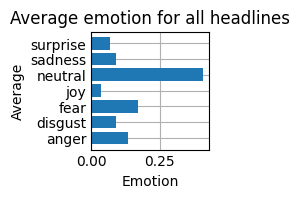

In [38]:
def create_barplot():
    avr_anger, avr_disgust, avr_fear, avr_joy, avr_neutral, avr_sadness, avr_surprise = find_average()
    #saving average values in y variable
    y = avr_anger, avr_disgust, avr_fear, avr_joy, avr_neutral, avr_sadness, avr_surprise
    x = ('anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise')

    #create plot
    #fig, ax = plt.subplots()
    #plt.barh(x, y, edgecolor="white", linewidth=0.7, align='center')
    #plt.title('Average score of each emotion (all headlines)')
    # make an agg figure
    #fig.canvas.draw()
    plt.barh(x, y)

    plt.xlabel('Emotion')
    plt.ylabel('Average')
    plt.title('Average emotion for all headlines')

    plt.subplots_adjust(left=0.40, bottom=0.40)
    #saving plot
    plt.savefig('../out/average2.png')
    
    plt.show()

create_barplot()